# Constructing Hamiltonian of Tight-binding model for Finite lattice systems

In [1]:
import numpy as np
from numpy import savetxt
from numpy import loadtxt
from numpy import linalg as la

import matplotlib.pyplot as plt
import pandas as pd

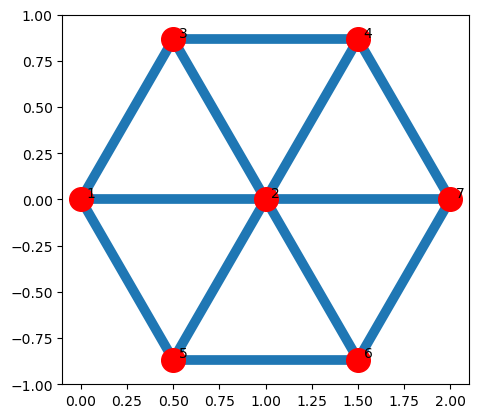

In [2]:
#number of finite lattice or sites (dim)
dim = 7

#d(idx, x, y)
#x = np.cos(60*np.pi/180) # = 0.5
y = np.sin(60*np.pi/180) 

#manually construct the coordinates data
d = ([0.0, 1.0, 0.5, 1.5, 0.5, 1.5, 2.0],
     [0.0, 0.0, y, y, -y, -y, 0.0],
     [1, 2, 3, 4, 5, 6, 7])
d = np.array(d)

ml=7
#for visualization
#3 sites
plt.plot([d[0,0], d[0,2]], [d[1,0], d[1,2]], 'C0', linewidth=ml)
#4 sites
plt.plot([d[0,2], d[0,3]], [d[1,2], d[1,3]], 'C0', linewidth=ml)
#5 sites
plt.plot([d[0,0], d[0,4]], [d[1,0], d[1,4]], 'C0', linewidth=ml)
#6 sites
plt.plot([d[0,4], d[0,5]], [d[1,4], d[1,5]], 'C0', linewidth=ml)
#7 sites
plt.plot([d[0,3], d[0,6]], [d[1,3], d[1,6]], 'C0', linewidth=ml)
plt.plot([d[0,5], d[0,6]], [d[1,5], d[1,6]], 'C0', linewidth=ml)

#plot the lattices
for i in range(dim):
    plt.plot([d[0,1], d[0,i]], [d[1,1], d[1,i]], 'C0', linewidth=ml)
    plt.text(d[0,i]+0.03, d[1,i]+0.01, str(int(d[2,i])), size = 10, color = 'black')
for i in range(dim):
    plt.plot(d[0,i], d[1,i], 'or', markersize=17)
    
#show degree 
#if dim > 2:
#    plt.text(d[0,2]-0.07, d[1,2]-0.2, '$60^o$', size = 19, color = 'black')
#    plt.text(d[0,1]-0.22, d[1,1]+0.04, '$60^o$', size = 19, color = 'black')

plt.axis('square')
plt.xlim(-0.1,2.1)
plt.ylim(-1,1)
#plt.axis('off')
plt.show()

In [3]:
#create coordinate file
co = np.zeros((dim, 3), dtype=float)
print( " x  ", "  y  ", "  idx")
for i in range(dim):
    co[i][0] = d[0][i]
    co[i][1] = d[1][i]
    co[i][2] = int(d[2][i])
    print(d[0][i]," ", d[1][i],"   ", int(d[2][i]))
#savetxt('/home/hubbard/coor'+ str(dim) +'.txt', co, delimiter=',')

 x     y     idx
0.0   0.0     1
1.0   0.0     2
0.5   0.8660254037844385     3
1.5   0.8660254037844385     4
0.5   -0.8660254037844385     5
1.5   -0.8660254037844385     6
2.0   0.0     7


In [4]:
#create distance file
di = np.zeros((dim**2, 3), dtype=float)

#for calculating coulomb
dimat = np.zeros((dim, dim), dtype=float)

count = 0
print("i", "j", "dist")
for i in range(dim):
    for j in range(dim):
        dx = d[0][i] - d[0][j]
        dy = d[1][i] - d[1][j]
        r = np.sqrt(dx**2 + dy**2)
        
        lim = 1e-4
        #convert 0.9999999999999999 into 1.0
        if np.absolute(1-r) <= lim:
            r = 1.0
        #convert 1.9999999999999998 into 2.0
        if np.absolute(2-r) <= lim:
            r = 2.0
        print(i+1, j+1, r)
        di[count][0] = int(i+1)
        di[count][1] = int(j+1)
        di[count][2] = r
        
        dimat[i][j] = r
        
        count += 1
        
#savetxt('/home/hubbard/dist_'+ str(dim) +'.csv', di, delimiter=',')

i j dist
1 1 0.0
1 2 1.0
1 3 1.0
1 4 1.7320508075688772
1 5 1.0
1 6 1.7320508075688772
1 7 2.0
2 1 1.0
2 2 0.0
2 3 1.0
2 4 1.0
2 5 1.0
2 6 1.0
2 7 1.0
3 1 1.0
3 2 1.0
3 3 0.0
3 4 1.0
3 5 1.732050807568877
3 6 2.0
3 7 1.7320508075688772
4 1 1.7320508075688772
4 2 1.0
4 3 1.0
4 4 0.0
4 5 2.0
4 6 1.732050807568877
4 7 1.0
5 1 1.0
5 2 1.0
5 3 1.732050807568877
5 4 2.0
5 5 0.0
5 6 1.0
5 7 1.7320508075688772
6 1 1.7320508075688772
6 2 1.0
6 3 2.0
6 4 1.732050807568877
6 5 1.0
6 6 0.0
6 7 1.0
7 1 2.0
7 2 1.0
7 3 1.7320508075688772
7 4 1.0
7 5 1.7320508075688772
7 6 1.0
7 7 0.0


In [5]:
#create hamiltonian files
#nearest neighbor t value
t = -3.0 + 0j

#hamilton
H = np.zeros((dim, dim), dtype=complex)

#for saving the data into file
row = np.array([], dtype=int)
col = np.array([], dtype=int)
treal = np.array([], dtype=float)
timag = np.array([], dtype=float)

print("t.real", "t.imag", "row", "col")
for i in range(dim**2):
    if di[i][2] == 1:
        ii = int(di[i][0]-1)
        jj = int(di[i][1]-1)
        H[ii][jj] = t
        
        row = np.append(row, di[i][0])
        col = np.append(col, di[i][1])
        treal = np.append(treal, t.real)
        timag = np.append(timag, t.imag)
        
        print(t.real, "  ",t.imag, " ", int(di[i][0]), " ",int(di[i][1]))

#to keep the original data type of each variables, use dataframe
df = pd.DataFrame(data = (treal, timag, row, col))
df = df.T

#save files
#savetxt('/home/hubbard/H0_'+ str(dim) +'_a25.dat', df, delimiter=',')
#savetxt('/home/hubbard/htb_hmatrix_'+ str(dim) +'.csv', H, delimiter=',')

t.real t.imag row col
-3.0    0.0   1   2
-3.0    0.0   1   3
-3.0    0.0   1   5
-3.0    0.0   2   1
-3.0    0.0   2   3
-3.0    0.0   2   4
-3.0    0.0   2   5
-3.0    0.0   2   6
-3.0    0.0   2   7
-3.0    0.0   3   1
-3.0    0.0   3   2
-3.0    0.0   3   4
-3.0    0.0   4   2
-3.0    0.0   4   3
-3.0    0.0   4   7
-3.0    0.0   5   1
-3.0    0.0   5   2
-3.0    0.0   5   6
-3.0    0.0   6   2
-3.0    0.0   6   5
-3.0    0.0   6   7
-3.0    0.0   7   2
-3.0    0.0   7   4
-3.0    0.0   7   6


In [6]:
#check:
H.real/3

array([[ 0., -1., -1.,  0., -1.,  0.,  0.],
       [-1.,  0., -1., -1., -1., -1., -1.],
       [-1., -1.,  0., -1.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  0.,  0., -1.],
       [-1., -1.,  0.,  0.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0., -1.,  0., -1.],
       [ 0., -1.,  0., -1.,  0., -1.,  0.]])

In [7]:
#coulomb elements
U = 1000 + 0j
Dnn = 100 + 0j
Xnn = 10 + 0j
Ann = 5 + 0j
#neighbors
ne = dim

#for saving the data into file
vi = np.array([], dtype=int)
vj = np.array([], dtype=int)
vk = np.array([], dtype=int)
vl = np.array([], dtype=int)
vreal = np.array([], dtype=float)
vimag = np.array([], dtype=float)

print('on-site interaction U:')
for i in range(ne):
    for j in range(ne):
        for k in range(ne):
            for l in range(ne):
                if i == j and i == k and i == l: 
                    v = U
                   
                    vi = np.append(vi, i+1)
                    vj = np.append(vj, j+1)
                    vk = np.append(vk, k+1)
                    vl = np.append(vl, l+1)
                    vreal = np.append(vreal, v.real)
                    vimag = np.append(vimag, v.imag)
                    
                    print(v, i+1, j+1, k+1, l+1)
                    
#to keep the original data type of each variables, use dataframe
df2 = pd.DataFrame(data = (vreal, vimag, vi, vj, vk, vl))
df2 = df2.T

#save files
#savetxt('/home/hubbard/Coul'+ str(dim) +'.dat', df2, delimiter=',')

on-site interaction U:
(1000+0j) 1 1 1 1
(1000+0j) 2 2 2 2
(1000+0j) 3 3 3 3
(1000+0j) 4 4 4 4
(1000+0j) 5 5 5 5
(1000+0j) 6 6 6 6
(1000+0j) 7 7 7 7


In [8]:
#display distance variable as matrix
dimat

array([[0.        , 1.        , 1.        , 1.73205081, 1.        ,
        1.73205081, 2.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        , 1.73205081,
        2.        , 1.73205081],
       [1.73205081, 1.        , 1.        , 0.        , 2.        ,
        1.73205081, 1.        ],
       [1.        , 1.        , 1.73205081, 2.        , 0.        ,
        1.        , 1.73205081],
       [1.73205081, 1.        , 2.        , 1.73205081, 1.        ,
        0.        , 1.        ],
       [2.        , 1.        , 1.73205081, 1.        , 1.73205081,
        1.        , 0.        ]])

In [9]:
#diagonalize hamiltonian to get energy and eigen vector
w, v = la.eig(H)
xe = []

eigval = np.sort(w.real)
#savetxt('/home/hubbard/eigval'+ str(dim) +'.dat', eigval, delimiter=',')

#eigval
print('idx \t Energy')
for i in range(len(w)):
    xe.append(i+1)
    print(i+1, w[i])

idx 	 Energy
1 (-10.937253933193766+0j)
2 (-3+0j)
3 (3.000000000000001+0j)
4 (5.999999999999999+0j)
5 (4.937253933193775+0j)
6 (-2.999999999999999+0j)
7 (2.9999999999999987+0j)


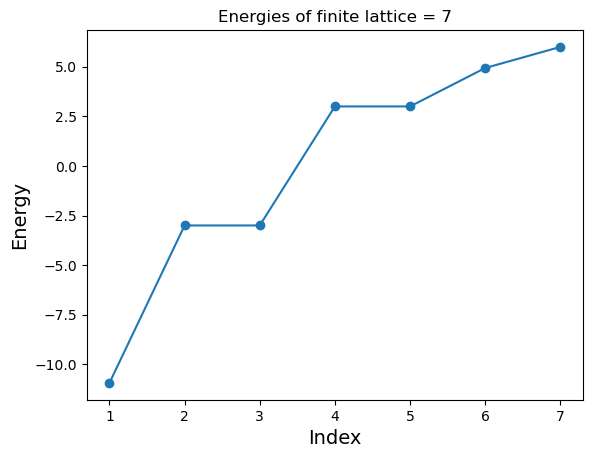

In [10]:
#plot the energy
plt.plot(xe, eigval, linestyle='solid', marker='o')
plt.ylabel("Energy", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.title('Energies of finite lattice = '+ str(dim))
plt.show()